<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> Advanced House Price Prediction - Model Selection </h2>
</div>



- The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead
- In previous Notebook we preprocessed and applied all FE and created new train and test data.
- Here we will apply different models to get good prediction

- Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following Regression algorithms:

          1. Linear Regression
          2. Robust Regression
          3. Ridge Regression
          4. KERNEL Ridge Regression
          5. LASSO Regression
          6. Elastic Net
          7. Polynomial Regression
          8. Gradient Boosting Regressor
          9. Stochastic Gradient Descent (SGD)
          10. Random Forest Regressor
          11. Support Vector Machine Regression
          12. XGBOOST
          13. lightgbm
          14. Artificial Neaural Networks
        
**Below few Req of  linear regression**     

- **1.Linear Assumption**. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).


- **2.Remove Noise**. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.


- **3.Remove Collinearity**. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.


- **4.Gaussian Distributions**. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.


- **5.Rescale Inputs**: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## GOAL:

**Apply different models and Compare all evaluation matrics( MSE,MAE, RMSE, RMSLE) and R2, Based on this finalize the model**

<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 1. Import all Librariy  </h2>
</div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas 
%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

## ANN LIBRARY
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer

In [5]:
train=pd.read_csv(r'./Dataset/train_Processed.csv')
test=pd.read_csv(r'./Dataset/test_Processed.csv')

#Kaggle path
#train=pd.read_csv(r'/kaggle/input/train-processedcsv/train_Processed.csv')
#test=pd.read_csv(r'/kaggle/input/test-processedcsv/test_Processed.csv')

In [6]:
[features for features in train.columns if train[features].isnull().sum()>1]

[]

In [7]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1452,5.685,1.541,1.856,2.747,0.73,1.194,1.541,1.541,1.82,1.194,...,0.0,0.73,1.820,1.194,0.000,2.603,14.194,1.541,1.82,12.073
1453,3.859,1.541,1.932,2.818,0.73,1.194,1.541,1.541,1.82,1.194,...,0.0,0.73,1.541,1.194,0.000,1.194,14.198,1.541,1.82,12.255
1454,5.969,1.541,1.872,2.766,0.73,1.194,1.541,1.541,1.82,1.194,...,0.0,0.73,1.194,0.730,14.892,2.056,14.198,1.541,1.82,12.493
1455,3.859,1.541,1.879,2.776,0.73,1.194,1.541,1.541,1.82,1.194,...,0.0,0.73,1.820,1.194,0.000,1.820,14.198,1.541,1.82,11.864
1456,3.859,1.541,1.902,2.779,0.73,1.194,1.541,1.541,1.82,1.194,...,0.0,0.73,1.820,1.194,0.000,2.260,14.195,1.541,1.82,11.902


In [8]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,7.620,1.194,1.569,2.535,0.73,1.194,1.541,1.541,1.82,...,0.0,0.0,0.73,1.820,1.194,0.000,2.260,14.192,1.541,1.820
1455,2916,7.620,1.194,1.569,2.531,0.73,1.194,1.541,1.541,1.82,...,0.0,0.0,0.73,1.820,1.194,0.000,1.820,14.192,1.541,1.194
1456,2917,3.859,1.541,2.073,2.873,0.73,1.194,1.541,1.541,1.82,...,0.0,0.0,0.73,1.820,1.194,0.000,2.750,14.192,1.541,1.194
1457,2918,6.338,1.541,1.856,2.786,0.73,1.194,1.541,1.541,1.82,...,0.0,0.0,0.73,1.541,0.730,11.148,2.440,14.192,1.541,1.820
1458,2919,5.685,1.541,1.899,2.774,0.73,1.194,1.541,1.541,1.82,...,0.0,0.0,0.73,1.820,1.194,0.000,3.011,14.192,1.541,1.820


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 2. Split train AS Input (X_train) and Output(y_train )</h2>
</div>

In [9]:
## Capture the dependent feature
trainY=train[['SalePrice']]
## drop dependent feature from dataset
trainX=train.drop(['SalePrice'],axis=1)

> Split data to train test for evaluation later

In [10]:
#TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.3, random_state=42)

<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3. Model Build </h2>
</div>

## 3.1 Define a cross validation strategy

- 1. We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

- 2. **Evaluation** of regression model

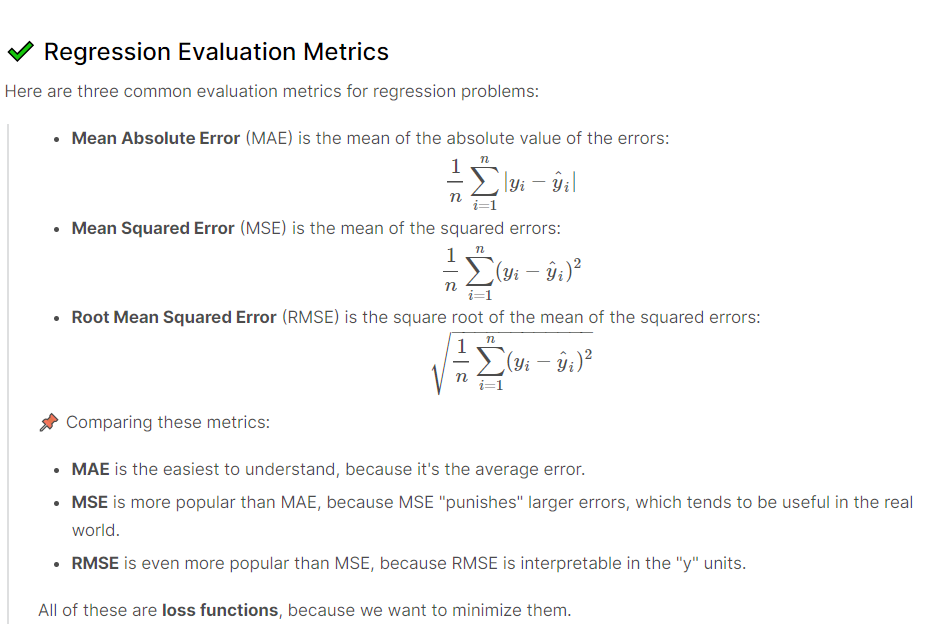

In [11]:
# DEFINE EVALUATION MATRICS

# Cross val score is whole data score, not the train test splitted data score with kfold=10
def cross_val(model):
    #This is whole set, not the splitted
    pred = cross_val_score(model, trainX, trainY, cv=10)
    return format(round(pred.mean(),4),'.4f')

# Here evaluation matrics for splitted test data
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    rmsle = np.sqrt(metrics.mean_squared_log_error(true, predicted)) 
    # This rmsle is the matrics defined in kaggle for this casestudy
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('RMSLE:', rmsle)
    print('R2 Square', r2_square)
    print('__________________________________')
    

# Here evaluation matrics for splitted test data
def evaluate(true, predicted):
    mae = round(metrics.mean_absolute_error(true, predicted),4)
    mse = round(metrics.mean_squared_error(true, predicted),4)
    rmse = round(np.sqrt(metrics.mean_squared_error(true, predicted)),4)
    rmsle = round(np.sqrt(metrics.mean_squared_log_error(true, predicted)) ,4)
    r2_square =metrics.r2_score(true, predicted)
    return format(mae,'.4f'), format(mse,'.4f'), format(rmse,'.4f'), format(rmsle,'.4f') ,format(r2_square,'.4f')


<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.1. Linear Regression</h2>
</div>

#### 3.1.1 Base models - Linear Regression :

In [12]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [13]:
# print the intercept
print(lin_reg.intercept_)

[7.27026011]


In [14]:
cf =  pd.DataFrame(lin_reg.coef_ ).T
col = pd.DataFrame(X_train.columns, columns=['columns'])

coeff_val = pd.concat([col,cf], axis=1 )

coeff_val.columns = ['columns','Coeffecient']

coeff_val.head()

,columns,Coeffecient
0,MSSubClass,-0.002020
1,MSZoning,0.045016
2,LotFrontage,0.058830
3,LotArea,0.596490
4,Street,0.200344


### 3.1.2 Linear Regression  - Predictions 
- Let's grab predictions off our test set and see how well it did!

> This code not working here
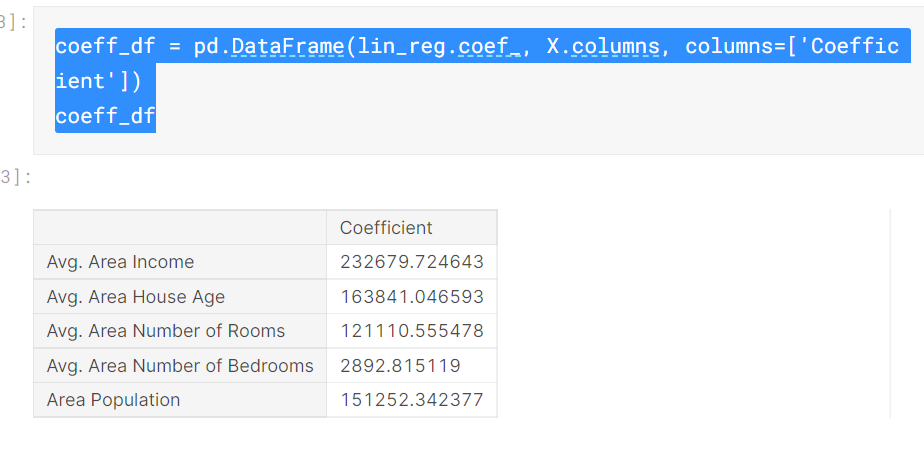

In [15]:
pred = lin_reg.predict(X_test)

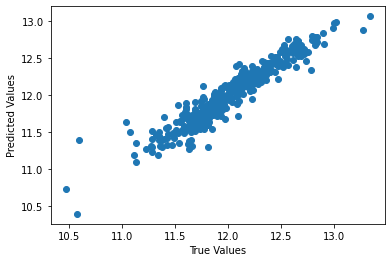

In [16]:
plt.scatter(y_test,pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

> Here x and y value are same, which is diagnoal

C:\Users\prabh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

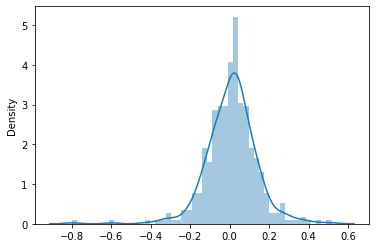

In [17]:
#Residual distplot
sns.distplot((y_test-pred),bins=50)
# here actual - pred will give residul plot in histogram of the residuals and make sure it looks normally distributed

> Here residual plot also Normal distributed. Its good

In [18]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.09200419652645721
MSE: 0.016524948082654027
RMSE: 0.1285493993865939
RMSLE: 0.010044662612953281
R2 Square 0.8999237203009398
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0829336752409062
MSE: 0.012894485506140916
RMSE: 0.11355388811547104
RMSLE: 0.008803387372522445
R2 Square 0.9179099650011417
__________________________________


In [19]:
results_df = []
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001


> This looks good model


<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.2. Robust Regression</h2>
</div>


- Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

- One instance in which robust estimation should be considered is when there is a strong suspicion of heteroscedasticity.

- A common situation in which robust estimation is used occurs when the data contain outliers. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is inefficient and can be biased. Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. (In many situations, including some areas of geostatistics and medical statistics, it is precisely the outliers that are of interest.)

In [20]:
#RANSACRegressor - Robust Regression

#ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

model = make_pipeline(RobustScaler(), RANSACRegressor(base_estimator=LinearRegression(), max_trials=100))

#model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.1408822790629619
MSE: 0.04305408587673572
RMSE: 0.20749478517961775
RMSLE: 0.01634140539555923
R2 Square 0.7392613447959739
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12183619916377172
MSE: 0.03300014385412409
RMSE: 0.1816594171908632
RMSLE: 0.014152258946300155
R2 Square 0.7899115119667034
__________________________________


> This looks bad model, R2 is -ve

In [21]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , 0  ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE','RMSLE', 'R2 Square', "Cross Validation"])

results_df = results_df.append(results_df_2, ignore_index=True)
print(results_df)

# Here we commented the appned, because values are huge and making final table results_df very big

               Model     MAE     MSE    RMSE   RMSLE R2 Square  \
0  Linear Regression  0.0920  0.0165  0.1285  0.0100    0.8999   
1  Robust Regression  0.1409  0.0431  0.2075  0.0163    0.7393   

  Cross Validation  
0           0.9001  
1                0  


> We are getting below error for RMSLE Calculation.
So we scaled the data by using **RobustScalar** in pipeline, so it avoided the error

> Error:#ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

 

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.3. Ridge Regression</h2>
</div>


- Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,
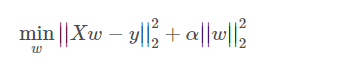
 
- α>=0  is a complexity parameter that controls the amount of shrinkage: the larger the value of  α , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

- Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

In [22]:
# Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.12194177586636043
MSE: 0.028284326867565643
RMSE: 0.1681794484102194
RMSLE: 0.013139427370138826
R2 Square 0.8287080726341666
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11153581585453175
MSE: 0.023060695150129797
RMSE: 0.15185748302316154
RMSLE: 0.011719573517900954
R2 Square 0.8531889255239691
__________________________________


In [23]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE','RMSLE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968


> LR is better than RR, LR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.4. KERNEL Ridge Regression </h2>
</div>


> It looks like Polynomial used kernel ='polynomial'

In [24]:

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

KRR.fit(X_train, y_train)

test_pred = KRR.predict(X_test)
train_pred = KRR.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.09212467842551188
MSE: 0.017179007087897463
RMSE: 0.1310687113230975
RMSLE: 0.01027026225150506
R2 Square 0.8959626917021789
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06226107682655711
MSE: 0.007176782442455651
RMSE: 0.08471589250226695
RMSLE: 0.006551234435511253
R2 Square 0.9543105212224403
__________________________________


In [25]:
results_df_2 = pd.DataFrame(data=[["Kernel Regression", *evaluate(y_test, test_pred) , cross_val(KernelRidge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE','RMSLE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972


> LR is better than KR and RR, LR has less Errors(MSE,RMSE) and incrased R2 but KR almost same

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.5. LASSO Regression </h2>
</div>

- A linear model that estimates sparse coefficients.

- Mathematically, it consists of a linear model trained with  ℓ1  prior as regularizer. The objective function to minimize is:
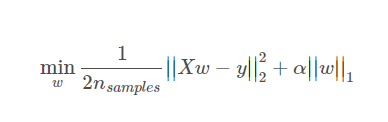

- The lasso estimate thus solves the minimization of the least-squares penalty with  α∣∣w∣∣1  added, where  α  is a constant and  ∣∣w∣∣1  is the  ℓ1−norm  of the parameter vector.

In [26]:
# Lasso

#In case scalarization is not done, we can use this pipeline method with RobustScaler() as 1st one before Laso regression

#model = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2122765541459009
MSE: 0.0778875030146329
RMSE: 0.27908332629276317
RMSLE: 0.021560266477456316
R2 Square 0.5283076535087116
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.19925158401917853
MSE: 0.06967244337531595
RMSE: 0.2639553814100329
RMSLE: 0.02021538967053977
R2 Square 0.5564450157850951
__________________________________


In [27]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE','R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067


- This looks bad model, R2 is -ve

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.6. Elastic Net</h2>
</div>

- A linear regression model trained with **L1 and L2 prior as regularizer**.

- This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

- Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

- A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

- The objective function to minimize is in this case
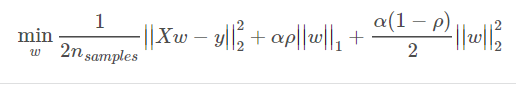

In [28]:
# ElasticNet

# To handle Outlier, we can use RobustScaler() in pipeline
model = make_pipeline(RobustScaler(), 
                      ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
                     )
                      
                      
#model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.17846430210168365
MSE: 0.057396815297088885
RMSE: 0.23957632457546568
RMSLE: 0.01848448901887878
R2 Square 0.6524007390052735
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.16954429016161526
MSE: 0.05312263588575262
RMSE: 0.23048348289140508
RMSLE: 0.017628616244408465
R2 Square 0.6618058908192798
__________________________________


In [29]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE','R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836


> LR is better than ES, LR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.7. Polynomial Regression</h2>
</div>

- One common pattern within machine learning is to use **linear models trained on nonlinear functions of the data**. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

- For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

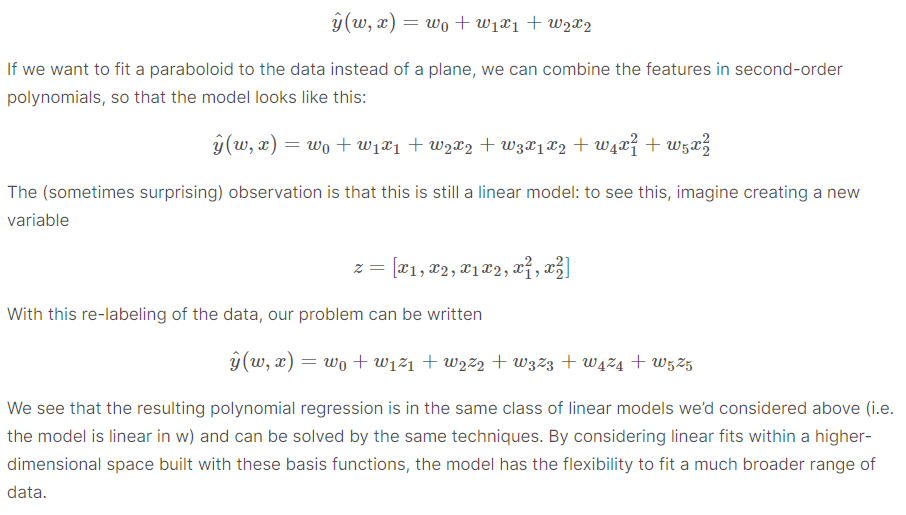

In [30]:
# PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.23547142294255674
MSE: 0.12256581500753759
RMSE: 0.35009400881411495
RMSLE: 0.02756038697139544
R2 Square 0.2577325675768415
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.678843726153358e-15
MSE: 3.532610483517685e-29
RMSE: 5.943576771202409e-15
RMSLE: 4.833222228488453e-16
R2 Square 1.0
__________________________________


In [31]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0


> LR is better than PR, LR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.8. Gradient Boosting Regressor</h2>
</div>

In [32]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X_train, y_train)

test_pred = GBoost.predict(X_test)
train_pred = GBoost.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test set evaluation:
_____________________________________
MAE: 0.08259770505283334
MSE: 0.01474764312782415
RMSE: 0.1214398745380781
RMSLE: 0.009582921670817368
R2 Square 0.9106872075373555
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0112091537132545
MSE: 0.0015957029588056838
RMSE: 0.03994625087296283
RMSLE: 0.0031570123045884177
R2 Square 0.9898412921032207
__________________________________


In [33]:
results_df_2 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0


> GBR is better than LR, GBR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.9. Stochastic Gradient Descent</h2>
</div>

- Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum

In [34]:
# SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.1562367959347396
MSE: 0.043278048533836065
RMSE: 0.20803376777301338
RMSLE: 0.016158641880067732
R2 Square 0.7379050107607918
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.15715405728197437
MSE: 0.04365277919727834
RMSE: 0.20893247520976327
RMSLE: 0.01603705824667298
R2 Square 0.7220937453925237
__________________________________


C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0
8,Stochastic Gradient Descent,0.1562,0.0433,0.2080,0.0162,0.7379,0


> GBR is better than SGD, GBR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 3.1.10. Random Forest Regressor</h2>
</div>

In [36]:
# RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test set evaluation:
_____________________________________
MAE: 0.09074595662100284
MSE: 0.01846935004915769
RMSE: 0.13590198692130182
RMSLE: 0.010696407256790655
R2 Square 0.8881482814872179
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03553955642786804
MSE: 0.002707936088098216
RMSE: 0.05203783323792619
RMSLE: 0.00404777402637404
R2 Square 0.9827604933798415
__________________________________


In [37]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0
8,Stochastic Gradient Descent,0.1562,0.0433,0.2080,0.0162,0.7379,0
9,Random Forest Regressor,0.0907,0.0185,0.1359,0.0107,0.8881,0


> GBR is better than RF, GBR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'>3.1.11.Support Vector Machine </h2>
</div>


In [38]:
# SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test set evaluation:
_____________________________________
MAE: 0.14112968659384198
MSE: 0.037327477410555185
RMSE: 0.1932032023817286
RMSLE: 0.015036242379987538
R2 Square 0.7739420994780452
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010602964830309983
MSE: 1.2579598494671147e-06
RMSE: 0.0011215880926022327
RMSLE: 8.60957941904261e-05
R2 Square 0.9999919914627055
__________________________________


In [39]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0
8,Stochastic Gradient Descent,0.1562,0.0433,0.2080,0.0162,0.7379,0
9,Random Forest Regressor,0.0907,0.0185,0.1359,0.0107,0.8881,0


> GBR is better than SVMR, GBR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'>3.1.12 XGBoost : </h2>
</div>

In [40]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train, y_train)

test_pred = model_xgb.predict(X_test)
train_pred = model_xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[14:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test set evaluation:
_____________________________________
MAE: 0.08400576198699812
MSE: 0.01467120701810393
RMSE: 0.12112475807242684
RMSLE: 0.009537388177280965
R2 Square 0.9111501101411768
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05858776806053636
MSE: 0.0063015477329314
RMSE: 0.07938228853422784
RMSLE: 0.006128758549563173
R2 Square 0.9598825192601166
__________________________________


In [41]:
results_df_2 = pd.DataFrame(data=[["XGBoost", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE','RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0
8,Stochastic Gradient Descent,0.1562,0.0433,0.2080,0.0162,0.7379,0
9,Random Forest Regressor,0.0907,0.0185,0.1359,0.0107,0.8881,0


> XGBoost is better than GLR, GBR has less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'>3.1.13 LightGBM : </h2>
</div>

In [42]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train, y_train)

test_pred = model_lgb.predict(X_test)
train_pred = model_lgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Test set evaluation:
_____________________________________
MAE: 0.08239866166978257
MSE: 0.014831855377003409
RMSE: 0.12178610502435575
RMSLE: 0.009613592453487608
R2 Square 0.9101772120710584
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04497335569904042
MSE: 0.003836785934051901
RMSE: 0.06194179472740438
RMSLE: 0.0047896041489

In [43]:
results_df_2 = pd.DataFrame(data=[["LightGBM", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0
8,Stochastic Gradient Descent,0.1562,0.0433,0.2080,0.0162,0.7379,0
9,Random Forest Regressor,0.0907,0.0185,0.1359,0.0107,0.8881,0


> LGBM and XGboost are almost same, Both have less Errors(MSE,RMSE) and incrased R2

<div class="alert alert-info" style="background-color:#004492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'>3.1.14. Artficial Neural Network </h2>
</div>

In [44]:
# Sequential
# optimizers - Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
1019/1019 [==============================] - 2s 1ms/step - loss: 48.9689 - val_loss: 2.2685
Epoch 2/100
1019/1019 [==============================] - 1s 1ms/step - loss: 2.1627 - val_loss: 1.6183
Epoch 3/100
1019/1019 [==============================] - 1s 1ms/step - loss: 1.6535 - val_loss: 1.2872
Epoch 4/100
1019/1019 [==============================] - 1s 1ms/step - loss: 1.3434 - val_loss: 0.9765
Epoch 5/100
1019/1019 [==============================] - 1s 1ms/step - loss: 1.1479 - val_loss: 0.8463
Epoch 6/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.9729 - val_loss: 0.6759
Epoch 7/100
1019/1019 [==============================] - 2s 1ms/step - loss: 0.8519 - val_loss: 0.6103
Epoch 8/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.7684 - val_loss: 0.5037
Epoch 9/100
1019/1019 [==============================] - 1s 1ms/step - loss: 0.6595 - val_loss: 0.4382
Epoch 10/100
1019/1019 [==============================] - 1s 1ms/step - 

In [45]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.16640282485474192
MSE: 0.05376863443521792
RMSE: 0.23188064696135793
RMSLE: 0.018197792870162457
R2 Square 0.6743732644810122
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12539385623950602
MSE: 0.027307739898965195
RMSE: 0.1652505367584783
RMSLE: 0.012749007179024704
R2 Square 0.8261510067246826
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,RMSLE,R2 Square,Cross Validation
0,Linear Regression,0.0920,0.0165,0.1285,0.0100,0.8999,0.9001
1,Robust Regression,0.1409,0.0431,0.2075,0.0163,0.7393,0
2,Ridge Regression,0.1219,0.0283,0.1682,0.0131,0.8287,0.8968
3,Kernel Regression,0.0921,0.0172,0.1311,0.0103,0.8960,0.8972
4,Lasso Regression,0.2123,0.0779,0.2791,0.0216,0.5283,-0.0067
5,Elastic Net Regression,0.1785,0.0574,0.2396,0.0185,0.6524,0.1836
6,Polynomail Regression,0.2355,0.1226,0.3501,0.0276,0.2577,0
7,Gradient Boosting Regressor,0.0826,0.0147,0.1214,0.0096,0.9107,0
8,Stochastic Gradient Descent,0.1562,0.0433,0.2080,0.0162,0.7379,0
9,Random Forest Regressor,0.0907,0.0185,0.1359,0.0107,0.8881,0


> LGBM and XGboost are almost same and its betetr that ANN.  Both have less Errors(MSE,RMSE, RMSLE) and incrased R2 compared to complex ANN

In [47]:
pd.DataFrame(r.history)

,loss,val_loss
0,48.968929,2.268457
1,2.162708,1.618274
2,1.653489,1.287207
3,1.343367,0.976534
4,1.147944,0.846310
...,...,...
95,0.109847,0.056680
96,0.125479,0.056420
97,0.119182,0.057655
98,0.123651,0.058921


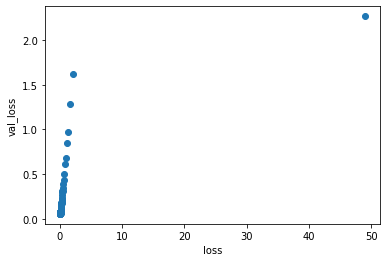

In [48]:
r_pd = pd.DataFrame(r.history)
#pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])
r_pd.iloc[:,0]
r_pd.iloc[:,1]
plt.scatter(r_pd.iloc[:,0],r_pd.iloc[:,1])
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.show()

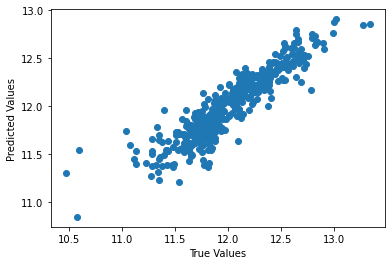

In [49]:
#pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

plt.scatter(y_test,pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 4. Models Comparison </h2>
</div>


In [50]:
results_df.set_index('Model', inplace=True)

In [51]:
#Converted object to float, else bar plot will show error
results_df['R2 Square'] = results_df['R2 Square'].astype(float)
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Linear Regression to Artficial Neural Network
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAE               14 non-null     object 
 1   MSE               14 non-null     object 
 2   RMSE              14 non-null     object 
 3   RMSLE             14 non-null     object 
 4   R2 Square         14 non-null     float64
 5   Cross Validation  14 non-null     object 
dtypes: float64(1), object(5)
memory usage: 784.0+ bytes


<AxesSubplot:ylabel='Model'>

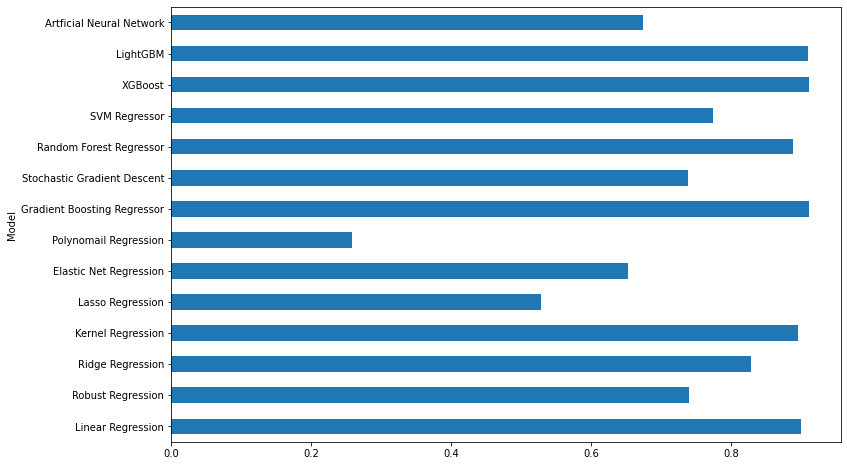

In [52]:
#barh plot

results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

> XGBoost and LightGBM having good R2 value. These 2 are the best models


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 5. Summary </h2>
</div>

### Metric
- Submissions are evaluated on Root-Mean-Squared-Error (RMSE) and RMSLE between the logarithm of the predicted value and the logarithm of the observed sales price.
- Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.


## Conclusion: 
- In earlier NOTEBOOK, we did all Preprocessing, Scalarization etc
- In this doc we tried most of the Regression algorithm, and found 2 model (XGBoost and LightGBM ) having less errors(MAE, MSE,RMSE,RMSLE) and high R2
- So we are finalizing our model with XGBoost and applying same model for Kaggle's Test dataset




<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 6. APPLY XGBOOST TO FINAL TEST DATA </h2>
</div>

In [53]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3.859,0.000,1.918,2.800,0.73,1.194,1.541,1.541,1.820,...,7.021,0.0,0.73,1.541,1.194,0.000,2.260,14.198,1.541,1.82
1,1462,3.859,1.541,1.920,2.828,0.73,1.194,1.194,1.541,1.541,...,0.000,0.0,0.73,1.820,0.000,20.778,2.260,14.198,1.541,1.82
2,1463,5.685,1.541,1.899,2.824,0.73,1.194,1.194,1.541,1.820,...,0.000,0.0,0.73,1.541,1.194,0.000,1.541,14.198,1.541,1.82
3,1464,5.685,1.541,1.912,2.779,0.73,1.194,1.194,1.541,1.820,...,0.000,0.0,0.73,1.820,1.194,0.000,2.260,14.198,1.541,1.82
4,1465,7.021,1.541,1.764,2.681,0.73,1.194,1.194,1.194,1.820,...,7.397,0.0,0.73,1.820,1.194,0.000,0.730,14.198,1.541,1.82


In [54]:
# Remove id from the data
test_ID = test['Id']

In [55]:
test_x = test.drop("Id", axis = 1)
test_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.859,0.000,1.918,2.800,0.73,1.194,1.541,1.541,1.820,1.194,...,7.021,0.0,0.73,1.541,1.194,0.000,2.260,14.198,1.541,1.82
1,3.859,1.541,1.920,2.828,0.73,1.194,1.194,1.541,1.541,1.194,...,0.000,0.0,0.73,1.820,0.000,20.778,2.260,14.198,1.541,1.82
2,5.685,1.541,1.899,2.824,0.73,1.194,1.194,1.541,1.820,1.194,...,0.000,0.0,0.73,1.541,1.194,0.000,1.541,14.198,1.541,1.82
3,5.685,1.541,1.912,2.779,0.73,1.194,1.194,1.541,1.820,1.194,...,0.000,0.0,0.73,1.820,1.194,0.000,2.260,14.198,1.541,1.82
4,7.021,1.541,1.764,2.681,0.73,1.194,1.194,1.194,1.820,1.194,...,7.397,0.0,0.73,1.820,1.194,0.000,0.730,14.198,1.541,1.82


In [56]:
"""model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train, y_train)

"""
# These are builded earlier, so directly predicting here by XGBoost

test_pred = model_xgb.predict(test_x)


In [57]:
test_pred[:6]

array([11.688843 , 12.0228   , 12.123938 , 12.183091 , 12.1572275,
       12.05218  ], dtype=float32)

> Here we are getting log1p(x) applied scaled SalesPrice, (We converted SalesPrice data to log1p(x) applied data during preprocessing and used this in model training)  

### 6.1 REVERT BACK OUTPUT TO ORIGINAL SCALE

- We will revert the log1p(x) applied data back to original scale by taking exp(Y)

> Y = Log1p(x)

> x = exp(Y)

In [58]:
test_pred = np.expm1(test_pred)

In [59]:
test_pred[:6]

array([119232.945, 166507.3  , 184228.52 , 195455.11 , 190464.72 ,
       171471.86 ], dtype=float32)


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'> 7. Prepare Submission File </h2>
</div>

- We make submissions in CSV files. Our submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the housing data is the string 'Id'). The prediction column will use the name of the target field.

- We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [60]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_pred})
# you could use any filename. We choose submission here
my_submission.to_csv(r'./Dataset/submission.csv', index=False)

### Make Submission

- Hit the Save version --> Then blue Publish button at the top of our notebook screen. It will take some time for our kernel to run. When it has finished our navigation bar at the top of the screen will have a tab for Output. 
- This only shows up if we have written an output file (like we did in the Prepare Submission File step).

### Last Steps

- Click on the Output button. This will bring us to a screen with an option to Submit to Competition. Hit that and we will see how our model performed.

- If we want to go back to improve your model, click the Edit button, which re-opens the kernel. we'll need to re-run all the cells when you re-open the kernel.

**Apllied different models and Compared all evaluation matrics( MSE,MAE, RMSE, RMSLE) and R2, Based on this finalized the XGBOOST model**


<div class="alert alert-info" style="background-color:#008492; color:white; padding:0px 10px; border-radius:2px;"><h2 style='margin:10px 5px'>END </h2>
</div>
